# see what angles get reconstructed well #

In [1]:
import os, sys
import numpy as np
import scipy.stats as stats
from keras.models import load_model
from sklearn.cross_validation import train_test_split
from keras.utils import np_utils
import math
import shelve
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib notebook

Using Theano backend.
/home/jkager/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/jkager/.local/lib/python2.7/site-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [2]:
def zenith_to_binary(zenith):
    if type(zenith) == np.ndarray:
        ret = np.copy(zenith)
        ret[ret < 1.5707963268] = 0
        ret[ret > 1] = 1
        return ret
    if isinstance(zenith, float):
        return 1 if zenith > 1.5707963268 else 0
    if isinstance(zenith, list):
        temp_zenith = np.array(zenith)
        temp_zenith[temp_zenith < 1.5707963268] = 0
        temp_zenith[temp_zenith > 1] = 1
        return temp_zenith.tolist()

In [4]:
file_location = '/data/user/jkager/NN_Reco/johannes/updownclassification_1/'
data_location = '/data/user/jkager/NN_Reco/johannes/updownclassification_1/datasets'

data =   np.load("datasets/updownclassification_using_keras_chargedata_filtered.npy")
labels = np.load("datasets/updownclassification_using_keras_labels_filtered.npy")
zeniths = np.load("datasets/updownclassification_using_keras_zeniths_filtered.npy")

In [5]:
test_size = 0.25
(trainData, testData, trainLabels, testLabels) = train_test_split(data, labels, test_size=test_size, random_state=16)
(trainZenith, testZenith) = train_test_split(zeniths, test_size=test_size, random_state=16)

In [6]:
print('\n Load the Model (saved_model.h5) \n')
model = load_model(os.path.join(file_location,'saved_model.h5'))


 Load the Model (saved_model.h5) 



In [29]:
res = model.predict(data)
testres = model.predict(testData)
trainres = model.predict(trainData)

In [34]:
res = np.argmax(res,axis=1)
testres = np.argmax(testres,axis=1)
trainres = np.argmax(trainres,axis=1)

In [36]:
correct = 0
for argm, zenith in zip(testres, testZenith*180/np.pi): 
    print argm, zenith
    if argm and zenith > 90 or not argm and zenith < 90:
        correct += 1
print float(correct) / len(testres)

0 47.67435907
1 142.511597149
0 124.476804563
1 71.7178543399
1 147.315480939
1 136.484481622
0 52.8663419581
1 120.802933762
0 69.4292263232
1 123.518588274
0 139.043581316
1 116.565144202
1 116.500072985
0 32.8852630719
0 66.2917562461
1 151.327653836
1 120.656507796
1 147.152516778
1 65.8401887052
1 37.4660445258
1 12.1715365942
1 138.731904746
0 11.2888075376
0 72.9375892655
0 161.569765907
1 137.933105539
0 21.2302488424
1 70.1127304861
1 5.3802251356
1 167.715120763
0 112.427334722
1 155.797460582
0 43.6190897681
0 39.3541984696
0 158.325833173
0 16.1758800039
0 47.5876290109
1 114.858125063
0 134.028980917
0 41.253968356
1 68.5052371497
1 113.372784076
0 58.8654403516
1 136.663061705
1 107.259453321
0 120.841405601
1 70.2469217595
1 142.105307302
0 60.2606866402
1 124.979534451
1 110.773271688
0 49.4093633259
0 71.1517730606
1 47.2482382402
0 43.5943309014
0 40.8451805108
0 121.541324325
0 37.774489294
1 115.388855241
1 107.378489342
1 147.773441904
0 161.119455129
0 37.23709887

In [41]:
test_out = testZenith
model_out = testres

splits = 19
x_hist = np.linspace(0,math.pi,splits)
y_hist = np.zeros((splits-1))
cor, summe = 0, 0
for i in range(len(x_hist)-1):
    indizes = np.bitwise_and(test_out >= x_hist[i], test_out < x_hist[i+1])
    correct = np.sum(model_out[indizes] == zenith_to_binary(test_out[indizes]))
    print correct, np.sum(indizes), x_hist[i] * 180/math.pi
    cor += correct
    summe += np.sum(indizes)
    if np.sum(indizes) > 0:
        y_hist[i] = float(correct)/np.sum(indizes)
print cor / float(summe)

17 26 0.0
39 64 10.0
68 85 20.0
68 105 30.0
90 134 40.0
80 130 50.0
104 176 60.0
65 110 70.0
0 0 80.0
0 0 90.0
88 119 100.0
157 220 110.0
164 219 120.0
117 160 130.0
102 143 140.0
79 111 150.0
52 69 160.0
16 21 170.0
0.690274841438


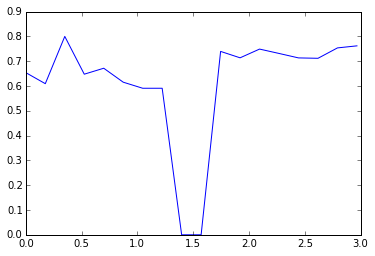

In [42]:
plt.plot(x_hist[:-1],y_hist)

In [ ]:
y_hist_items=[]
for x, y in zip(x_hist[:-1],y_hist):
    x = x * 180 / math.pi
    y_hist_items.extend([x+5] * int(y * 100))

In [14]:
np.linspace(0,180,19)

array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
         90.,  100.,  110.,  120.,  130.,  140.,  150.,  160.,  170.,  180.])

# now with unfiltered data #

In [3]:
file_location = '/data/user/jkager/NN_Reco/johannes/updownclassification_1/'
data_location = '/data/user/jkager/NN_Reco/johannes/updownclassification_1/datasets'

data =   np.load("datasets/updownclassification_using_keras_chargedata.npy")
labels = np.load("datasets/updownclassification_using_keras_labels.npy")
zeniths = np.load("datasets/updownclassification_using_keras_zeniths.npy")

In [4]:
test_size = 0.25
(trainData, testData, trainLabels, testLabels) = train_test_split(data, labels, test_size=test_size, random_state=16)
(trainZenith, testZenith) = train_test_split(zeniths, test_size=test_size, random_state=16)

In [8]:
print('\n Load the Model (saved_model_.h5) \n')
model = load_model(os.path.join(file_location,'saved_model_unfiltered.h5'))


 Load the Model (saved_model.h5) 



In [9]:
res = model.predict(data)
testres = model.predict(testData)
trainres = model.predict(trainData)

In [10]:
res = np.argmax(res,axis=1)
testres = np.argmax(testres,axis=1)
trainres = np.argmax(trainres,axis=1)

In [11]:
correct = 0
for argm, zenith in zip(testres, testZenith*180/np.pi): 
    #print argm, zenith
    if argm and zenith > 90 or not argm and zenith < 90:
        correct += 1
print float(correct) / len(testres)

0.653465346535


In [14]:
test_out = testZenith
model_out = testres

splits = 19
x_hist = np.linspace(0,math.pi,splits)
y_hist = np.zeros((splits-1))
cor, summe = 0, 0
for i in range(len(x_hist)-1):
    indizes = np.bitwise_and(test_out >= x_hist[i], test_out < x_hist[i+1])
    correct = np.sum(model_out[indizes] == zenith_to_binary(test_out[indizes]))
    cor += correct
    summe += np.sum(indizes)
    if np.sum(indizes) > 0:
        y_hist[i] = float(correct)/np.sum(indizes)
    print "correct: {:3d} of {:3d} (at angle-bin {:5.1f}) = {:3.1f}%".format(correct, np.sum(indizes), x_hist[i] * 180/math.pi, 100*y_hist[i])
print cor / float(summe)

correct:  21 of  28 (at angle-bin   0.0) = 75.0%
correct:  46 of  65 (at angle-bin  10.0) = 70.8%
correct:  63 of  88 (at angle-bin  20.0) = 71.6%
correct:  64 of  97 (at angle-bin  30.0) = 66.0%
correct:  70 of 109 (at angle-bin  40.0) = 64.2%
correct:  93 of 140 (at angle-bin  50.0) = 66.4%
correct: 129 of 177 (at angle-bin  60.0) = 72.9%
correct: 142 of 210 (at angle-bin  70.0) = 67.6%
correct: 130 of 279 (at angle-bin  80.0) = 46.6%
correct: 156 of 241 (at angle-bin  90.0) = 64.7%
correct: 152 of 238 (at angle-bin 100.0) = 63.9%
correct: 144 of 219 (at angle-bin 110.0) = 65.8%
correct: 138 of 215 (at angle-bin 120.0) = 64.2%
correct: 132 of 182 (at angle-bin 130.0) = 72.5%
correct: 123 of 168 (at angle-bin 140.0) = 73.2%
correct:  68 of  95 (at angle-bin 150.0) = 71.6%
correct:  37 of  57 (at angle-bin 160.0) = 64.9%
correct:   8 of  18 (at angle-bin 170.0) = 44.4%
0.653465346535


<IPython.core.display.Javascript object>


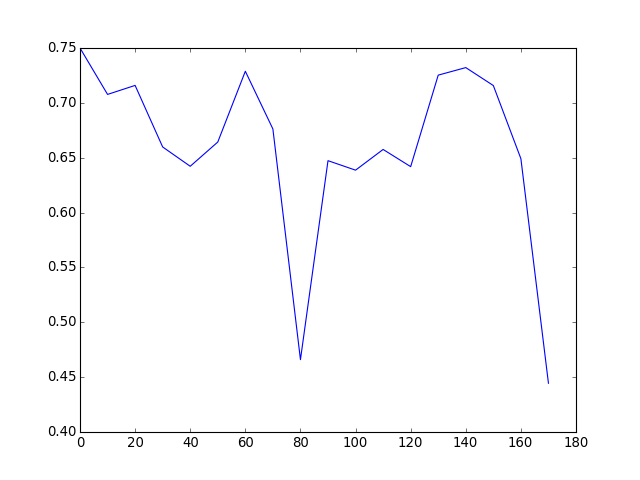

In [15]:
plt.plot(x_hist[:-1]*180/math.pi,y_hist)

# analyze  #